In [1]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [2]:
PATH = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
AI_Ready_Path = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
ai_ready_file = 'ai_ready_SHIPS_data.csv'

ai_ready_data = pd.read_csv(PATH + ai_ready_file)

In [3]:
ai_ready_data.head()

,Original_Times,Times,Daily_SST_Avg,Mid_Level_RH,Vert_Vel,Vshear,MSLP,Vmax,Latitude,Longitude
0,1982-06-02 12:00:00,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-06-02 12:00:00,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-06-02 12:00:00,0.0,27.1,57.0,6.631183,15.227542,1005.0,10.28888,21.7,87.1
3,1982-06-02 12:00:00,6.0,27.8,53.0,3.966363,15.536209,1004.0,12.86110,22.2,86.5
4,1982-06-02 12:00:00,12.0,27.9,56.0,4.403641,15.330431,1003.0,15.43332,22.6,85.8


In [9]:
scaler = StandardScaler()
storm_data = scaler.fit_transform(ai_ready_data.drop(columns=['Times', 'Original_Times']))

## Apply PCA on majority of the dataset

Explained variance ratio: [0.35541922 0.23775306]


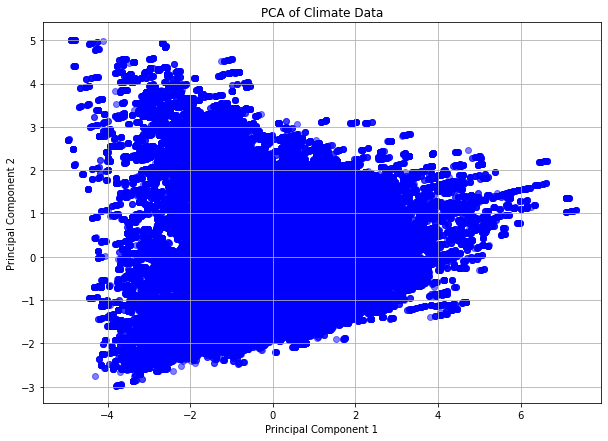

In [11]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
storm_data = storm_data[~np.isnan(storm_data).any(axis=1)]
storm_data_pca = pca.fit_transform(storm_data)

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(storm_data_pca[:, 0], storm_data_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Data')
plt.grid(True)
plt.show()

## Apply PCA on the Data that is relevant for Intensity

'Daily_SST_Avg', 'Mid_Level_RH', 'Vert_Vel', 'Vshear', 'MSLP', 'Vmax',

Explained variance ratio: [0.77583896 0.15358348]


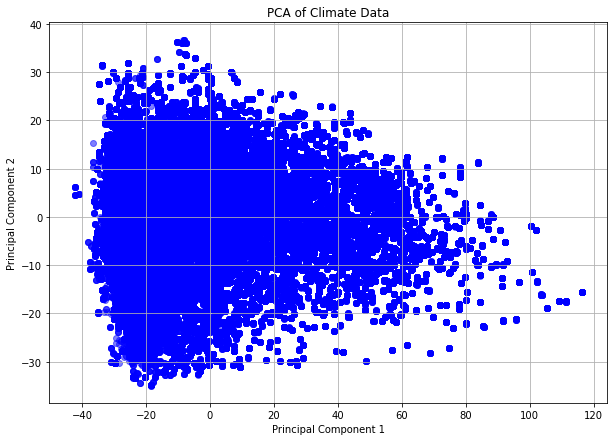

In [12]:
# Select the columns to keep
columns_to_keep = ['Daily_SST_Avg', 'Mid_Level_RH', 'Vert_Vel', 'Vshear', 'MSLP', 'Vmax']

# Filter the storm_data to keep only the specified columns
intensity_data_filtered = ai_ready_data[columns_to_keep]

intensity_pca = pca.fit_transform(intensity_data_filtered.dropna())

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(intensity_pca[:, 0], intensity_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Data')
plt.grid(True)
plt.show()

By honing in on specific features that have a stronger correlation with storm intensity we wwere able to improve the explained variance metric. The Principal Component (PC) 1 no explains approximately 78 % of the variance in the data. Therefore if I develop a Machine Learning (ML) model to predict storm intensity using these variables the model would be able to explain approximate 78 percent of the variance. Hence it would perform better than a model with all the data. 

## Apply PCA on the Data that is relevant to TC tracks

Explained variance ratio: [0.77143471 0.16620711]


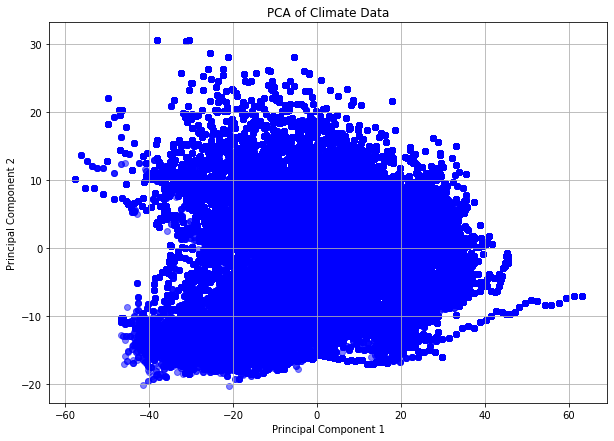

In [13]:
# Select the columns to keep
columns_to_keep = ['Longitude', 'Latitude', 'Vshear']

# Filter the storm_data to keep only the specified columns
track_data_filtered = ai_ready_data[columns_to_keep]

track_pca = pca.fit_transform(track_data_filtered.dropna())

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(track_pca[:, 0], track_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Data')
plt.grid(True)
plt.show()

Similar to the intensity model, reducing the number of variables led to the data explaining more of the variance. The PCA plot shows that the data is more spread out and less clustered, therefore the data should be suitable for developing a ML mode to predict storm tracks.

/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


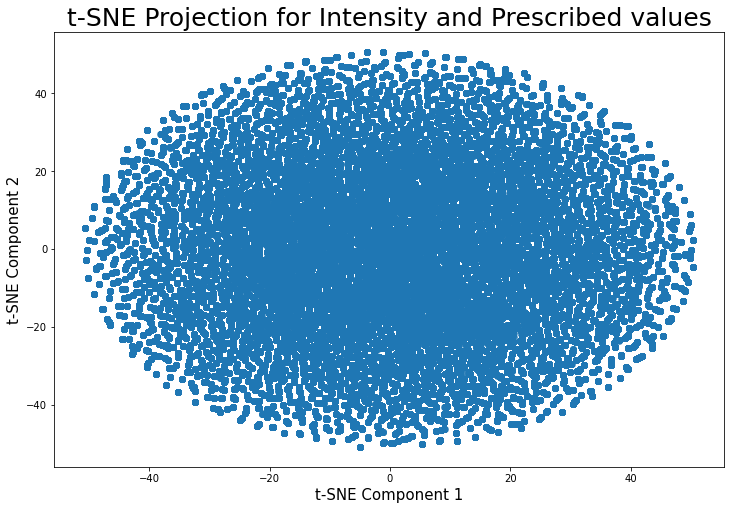

In [14]:
tsne = TSNE(n_components=2, random_state=42)
tsne_intensity_result = tsne.fit_transform(intensity_data_filtered.dropna())


# Plot the t-SNE result with the custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_intensity_result[:, 0], tsne_intensity_result[:, 1], alpha=0.6)

plt.title('t-SNE Projection for Intensity and Prescribed values',fontsize=25)
plt.xlabel('t-SNE Component 1',fontsize=15)
plt.ylabel('t-SNE Component 2',fontsize=15)
plt.show()



/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


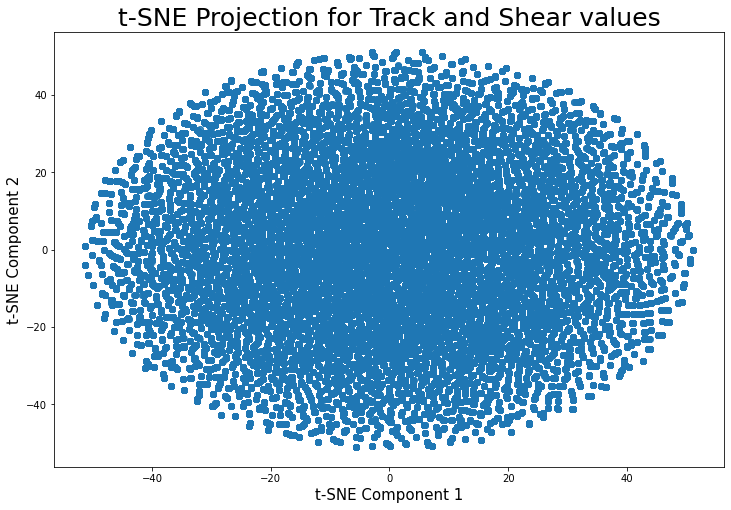

In [15]:
tsne = TSNE(n_components=2, random_state=42)
tsne_track_result = tsne.fit_transform(track_data_filtered.dropna())


# Plot the t-SNE result with the custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_track_result[:, 0], tsne_track_result[:, 1], alpha=0.6)

plt.title('t-SNE Projection for Track and Shear values',fontsize=25)
plt.xlabel('t-SNE Component 1',fontsize=15)
plt.ylabel('t-SNE Component 2',fontsize=15)
plt.show()

Performing the dimentionality reduction (PCA and t-SNE) on the data, allowed us to see what features were most important to our model.